## Assignment : 14

**Difffernt approches used 
1. Try up-sampling on overfitting
2. Try giving more weightage for minority classes
3. Try hyper-parameter tunning using simple loops.**

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import re
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

Using TensorFlow backend.


<pre>
1. Download the preprocessed DonorsChoose data from here <a href='https://drive.google.com/file/d/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO/view?usp=sharing'>Dataset</a>
2. Split the data into train, cv, and test
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric. you need to print the AUC value for each epoch. Note: you should NOT use the tf.metric.auc
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. You should Save the best model weights.
8. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
9. Use Categorical Cross Entropy as Loss to minimize.
10. try to get AUC more than 0.8 for atleast one model
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/preprocessed_data.csv')
data.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [0]:
X = data
y = data['project_is_approved'].values
X = X.drop(['project_is_approved'], axis=1)

In [0]:
X.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [7]:
print(X_train.shape,X_test.shape)
print(X_train.shape[0] + X_test.shape[0] )

(49041, 8) (36052, 8)
85093


In [8]:
unique = set(X_train['essay'].values) 
print("NO OF UNIQUE WORDS IN TRAIN ESSAY",len(unique))

NO OF UNIQUE WORDS IN TRAIN ESSAY 48852


In [0]:
#Converts a text to a sequence of words (or tokens).
#A list of words (or tokens).
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train["essay"])
sequences_train = tokenizer.texts_to_sequences(X_train["essay"])
sequences_cv = tokenizer.texts_to_sequences(X_cv["essay"])
sequences_test = tokenizer.texts_to_sequences(X_test["essay"])

In [10]:
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 41409 unique tokens.


In [19]:
#WORD---->RANK
word2idx['zz']

40371

In [11]:
encoded_train = pad_sequences(sequences_train,maxlen=800,padding='post')
print('Shape of data tensor:', encoded_train.shape)
encoded_test = pad_sequences(sequences_test, maxlen=800,padding='post')
encoded_cv = pad_sequences(sequences_cv, maxlen=800, padding='post')
print('Shape of data tensor:', encoded_test.shape)

Shape of data tensor: (49041, 800)
Shape of data tensor: (36052, 800)


In [0]:
pickle_in = open("/content/gdrive/My Drive/Colab Notebooks/glove_vectors","rb")

In [0]:
glove_words = pickle.load(pickle_in)
#glove_words

In [14]:
num_words = len(word2idx) + 1
embedding_matrix = np.zeros((num_words, 300))
for word, i in word2idx.items():
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


print(num_words)
print(embedding_matrix.shape)

41410
(41410, 300)


In [15]:
input_text = Input(shape=(800,),name="input_text")
X = Embedding(num_words,300,weights=[embedding_matrix],input_length=800,trainable=False)(input_text)
X = LSTM(128,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(X)
flatten_1 = Flatten()(X)











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# Teacher Prefix
#no_of_unique_prefix  = set(X_train['teacher_prefix'].values) 
no_of_unique_prefix  = X_train["teacher_prefix"].nunique()
print('Unique Categories:', (no_of_unique_prefix))


# Defining Input and Embedding Layer for the same

input_prefix = Input(shape=(1,),name="teacher_prefix")
embedding_prefix = Embedding(no_of_unique_prefix,3,name="emb_pre",trainable=True)(input_prefix)
flatten_2 = Flatten()(embedding_prefix)

lb = LabelEncoder()
encoder_prefix_train = lb.fit_transform(X_train["teacher_prefix"])
encoder_prefix_cv = lb.fit_transform(X_cv["teacher_prefix"])
encoder_prefix_test = lb.transform(X_test["teacher_prefix"])

Unique Categories: 5


In [17]:
# School State
no_of_unique_state  = X_train["school_state"].nunique()
embedding_size_state= int(np.ceil((no_of_unique_state)/2))
print('Unique Categories:', no_of_unique_state,'Embedding Size:', embedding_size_state)


# Defining Input and Embedding Layer for the same

input_state = Input(shape=(1,),name="school_prefix")
embedding_state = Embedding(no_of_unique_state,embedding_size_state,name="emb_state",trainable=True)(input_state)
flatten_3 = Flatten()(embedding_state)


encoder_state_train = lb.fit_transform(X_train["school_state"])
encoder_state_cv = lb.fit_transform(X_cv["school_state"])
encoder_state_test = lb.transform(X_test["school_state"])

Unique Categories: 51 Embedding Size: 26


In [18]:
# For project_grade_category
no_of_unique_grade  = X_train["project_grade_category"].nunique()
embedding_size_grade = int(np.ceil((no_of_unique_grade)/2))
print('Unique Categories:', no_of_unique_grade,'Embedding Size:', embedding_size_grade)


# Defining Input and Embedding Layer for the same

input_project_grade_category = Input(shape=(1,),name="project_grade_category")
embedding_project_grade_category = Embedding(no_of_unique_grade,embedding_size_grade,name="emb_project_grade_category",trainable=True)(input_project_grade_category)
flatten_4 = Flatten()(embedding_project_grade_category)


encoder_grade_train = lb.fit_transform(X_train["project_grade_category"])
encoder_grade_cv = lb.fit_transform(X_cv["project_grade_category"])
encoder_grade_test = lb.transform(X_test["project_grade_category"])

Unique Categories: 4 Embedding Size: 2


In [19]:
# For clean_categories
no_of_unique_grade  = X_train["clean_categories"].nunique()
embedding_size_grade = int(np.ceil((no_of_unique_grade)/2))
print('Unique Categories:', no_of_unique_grade,'Embedding Size:', embedding_size_grade)


# Defining Input and Embedding Layer for the same

input_clean_categories= Input(shape=(1,),name="clean_categories")
embedding_clean_categories = Embedding(500,embedding_size_grade,name="emb_clean_categories",trainable=True)(input_clean_categories)
flatten_5 = Flatten()(embedding_clean_categories)

#https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values/48169252#48169252
encoder_clean_categories_train = lb.fit_transform(X_train["clean_categories"])
X_test["clean_categories"] = X_test["clean_categories"].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
lb.classes_ = np.append(lb.classes_, '<unknown>')
encoder_clean_categories_test = lb.transform(X_test["clean_categories"])


encoder_clean_categories_cv = lb.fit_transform(X_train["clean_categories"])
X_cv["clean_categories"] = X_cv["clean_categories"].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
lb.classes_ = np.append(lb.classes_, '<unknown>')
encoder_clean_categories_cv = lb.transform(X_cv["clean_categories"])

Unique Categories: 50 Embedding Size: 25


In [20]:
# For clean_subcategories
no_of_unique_grade  = X_train["clean_subcategories"].nunique()
embedding_size_grade = int(np.ceil((no_of_unique_grade)/2))
print('Unique Categories:', no_of_unique_grade,'Embedding Size:', embedding_size_grade)


# Defining Input and Embedding Layer for the same

input_clean_subcategories= Input(shape=(1,),name="clean_subcategories")
embedding_clean_subcategories = Embedding(600,embedding_size_grade,name="emb_clean_subcategories",trainable=True)(input_clean_subcategories)
flatten_6 = Flatten()(embedding_clean_subcategories)

#https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values/48169252#48169252
encoder_clean_subcategories_train = lb.fit_transform(X_train["clean_subcategories"])
X_test["clean_subcategories"] = X_test["clean_subcategories"].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
lb.classes_ = np.append(lb.classes_, '<unknown>')
encoder_clean_subcategories_test = lb.transform(X_test["clean_subcategories"])

encoder_clean_subcategories_cv = lb.fit_transform(X_cv["clean_subcategories"])
X_cv["clean_subcategories"] = X_cv["clean_subcategories"].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
lb.classes_ = np.append(lb.classes_, '<unknown>')
encoder_clean_subcategories_cv = lb.transform(X_cv["clean_subcategories"])

Unique Categories: 379 Embedding Size: 190


In [0]:
# Now we will prepare numerical features for our model
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
#num_train_1=X_train['project_summary_numerical'].values
num_train_1=X_train['price'].values.reshape(-1, 1)
#num_train_3=X_train['quantity'].values
num_train_2=X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

#num_test_1=X_test['project_summary_numerical'].values
num_test_1=X_test['price'].values.reshape(-1, 1)
#num_test_3=X_test['quantity'].values
num_test_2=X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

#num_test_1=X_test['project_summary_numerical'].values
num_cv_1=X_cv['price'].values.reshape(-1, 1)
#num_test_3=X_test['quantity'].values
num_cv_2=X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)


num_train=np.concatenate((num_train_1,num_train_2),axis=1)
num_cv=np.concatenate((num_cv_1,num_cv_2),axis=1)
num_test=np.concatenate((num_test_1,num_test_2),axis=1)


In [0]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
norm_train=norm.fit_transform(num_train)
norm_test=norm.transform(num_test)
norm_cv=norm.transform(num_cv)

In [0]:
norm_train.shape

(76473, 2)

In [22]:
# Defining the Input and Embedding Layer for the same

num_feats = Input(shape=(2,),name="numerical_features")
num_feats_ = Dense(100,activation="relu",kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001))(num_feats)

In [0]:
x_concatenate = concatenate([flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,flatten_6,num_feats_])

In [49]:
x = Dense(32,activation="relu", kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001))(x_concatenate)

x=Dropout(0.5)(x)
x = Dense(128,activation="relu",kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001))(x)

x=Dropout(0.65)(x)
x = Dense(64,activation="relu", kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001))(x)
#x = BatchNormalization()(x)

output = Dense(2, activation='softmax', kernel_initializer="glorot_uniform",name='output')(x)
model_1 = Model(inputs=[input_text,
input_prefix,
input_state,
input_project_grade_category,
input_clean_categories,
input_clean_subcategories,
num_feats],outputs=[output])

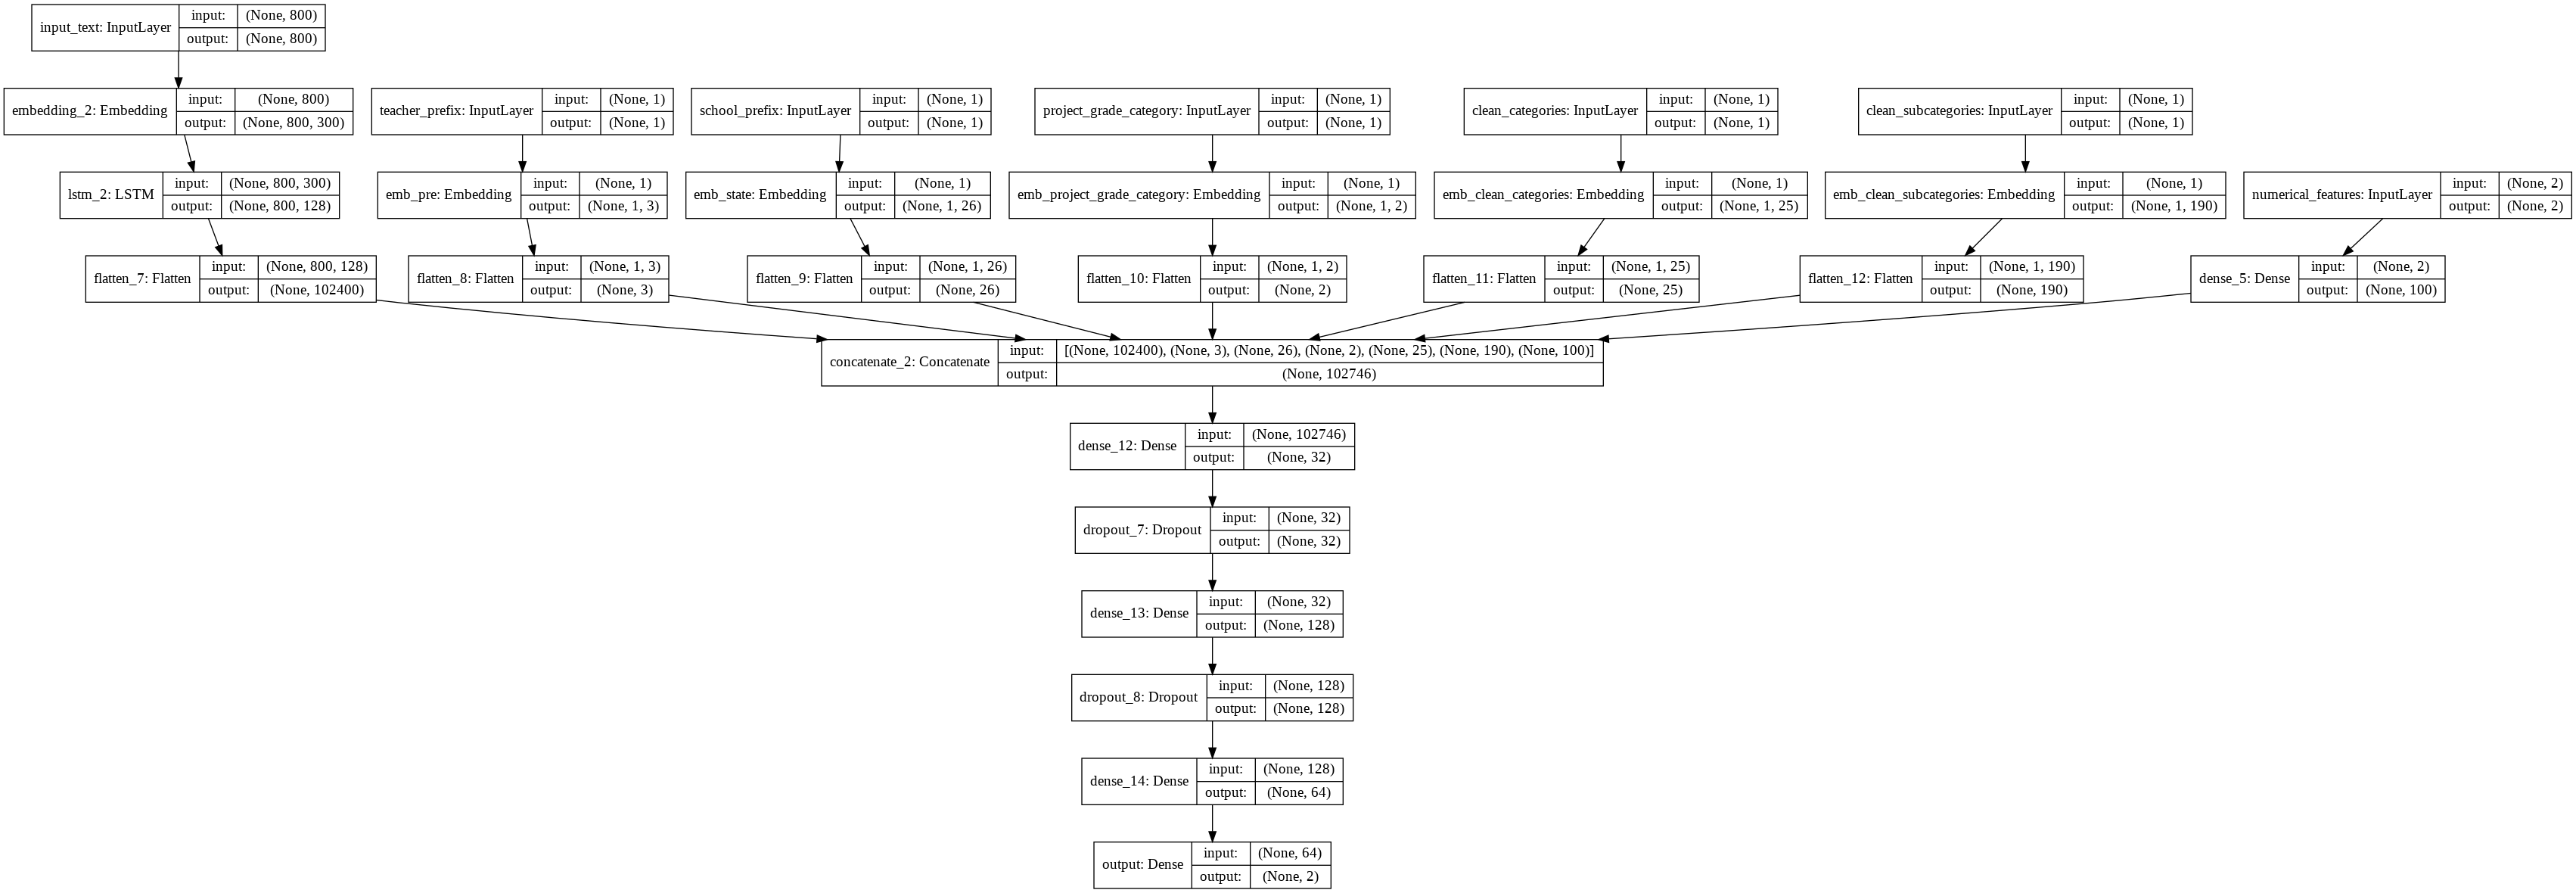

In [50]:
from keras.utils import plot_model
import pydot_ng as pydot
plot_model(model_1, show_shapes=True, show_layer_names=True, to_file='model_1.png')
from IPython.display import Image
Image(retina=True, filename='model_1.png')

In [0]:
train_data_1 = [encoded_train,
encoder_prefix_train,
encoder_state_train,
encoder_grade_train,
encoder_clean_categories_train,
encoder_clean_subcategories_train,
norm_train]
test_data_1 = [encoded_test,
encoder_prefix_test,
encoder_state_test,
encoder_grade_test,
encoder_clean_categories_test,
encoder_clean_subcategories_test ,
norm_test]
cv_data_1 = [encoded_cv,
encoder_prefix_cv,
encoder_state_cv,
encoder_grade_cv,
encoder_clean_categories_cv,
encoder_clean_subcategories_cv ,
norm_cv]

In [0]:
norm_train.shape

(76473, 2)

In [0]:
# Defining Custom ROC-AUC Metrics
from sklearn.metrics import roc_auc_score

def auc1(y_true, y_pred):
  return roc_auc_score(y_true, y_pred)

In [0]:
#https://www.tensorflow.org/api_docs/python/tf/py_func
def auc(y_true, y_pred):
    return tf.py_func(auc1, (y_true, y_pred), tf.double)

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auc])

In [0]:
##convert Y to one hot coding vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
Y_train = encoder.fit_transform(y_train.reshape(-1,1))
Y_cv = encoder.fit_transform(y_cv.reshape(-1,1))
Y_test = encoder.transform(y_test.reshape(-1,1))

Y_train = Y_train.toarray()
Y_cv = Y_cv.toarray()
Y_test = Y_test.toarray()

In [0]:
from tensorboardcolab import *


In [27]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://178b9191.ngrok.io


In [54]:
history_1 = model_1.fit(train_data_1,Y_train,batch_size=512,
                        epochs=10,validation_data=(cv_data_1,Y_cv),callbacks=[TensorBoardColabCallback(tbc)])


Train on 49041 samples, validate on 24155 samples
Epoch 1/10
49041/49041 [==============================] - 1064s 22ms/step - loss: 1.2731 - auc: 0.5949 - val_loss: 1.0125 - val_auc: 0.6590
Epoch 2/10
49041/49041 [==============================] - 1065s 22ms/step - loss: 0.9089 - auc: 0.6625 - val_loss: 0.8453 - val_auc: 0.6947
Epoch 3/10
49041/49041 [==============================] - 1071s 22ms/step - loss: 0.7787 - auc: 0.6983 - val_loss: 0.7564 - val_auc: 0.7103
Epoch 4/10
49041/49041 [==============================] - 1069s 22ms/step - loss: 0.6918 - auc: 0.7222 - val_loss: 0.7052 - val_auc: 0.7178
Epoch 5/10
49041/49041 [==============================] - 1066s 22ms/step - loss: 0.6297 - auc: 0.7406 - val_loss: 0.6392 - val_auc: 0.7226
Epoch 6/10
49041/49041 [==============================] - 1133s 23ms/step - loss: 0.5816 - auc: 0.7558 - val_loss: 0.5951 - val_auc: 0.7230
Epoch 7/10
49041/49041 [==============================] - 1105s 23ms/step - loss: 0.5471 - auc: 0.7642 - val_l

In [39]:

model_1 = load_model('/content/gdrive/My Drive/Colab Notebooks/model_1.h5', custom_objects={'auc': auc})



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
scores = model_1.evaluate(test_data_1, Y_test, verbose=0,batch_size=512)
#print("%s: %.2f%%" % (model_1.metrics_names[0], scores[0]*100))

In [56]:
print("%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

auc: 73.96%


In [0]:
model_1.save("/content/gdrive/My Drive/Colab Notebooks/model_12.h5")

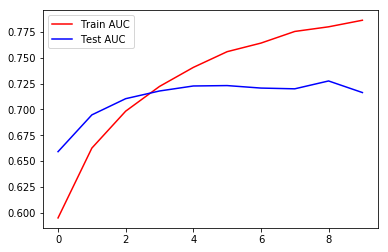

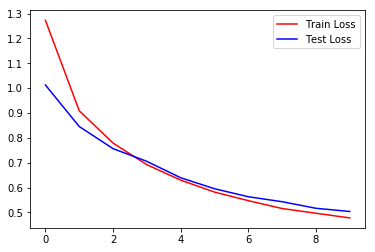

In [58]:
plt.plot(history_1.history['auc'], 'r')
plt.plot(history_1.history['val_auc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'b'})
plt.show()


plt.plot(history_1.history['loss'], 'r')
plt.plot(history_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [0]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data feature 'essay' <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

In [0]:
# Filtering Text Data based on idf values

tfidf = TfidfVectorizer(ngram_range=(1,1))
tfidf.fit(X_train["essay"])

# converting to dictionary
combine_dict = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))

In [0]:
tfidf_df = pd.DataFrame(list(combine_dict.items()), columns=['Word', 'TFIDF'])
tfidf_df = tfidf_df.sort_values(by ='TFIDF' )

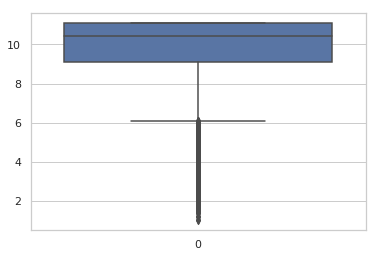

In [51]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot( data= tfidf_df['TFIDF'] )

In [0]:
print("MIN VAL:",tfidf_df["TFIDF"].min(),"MAX VALUE",tfidf_df["TFIDF"].max())

MIN VAL: 1.0077713116568965 MAX VALUE 11.551558912204982


In [0]:
print("\nPercentiles:")
for i in range(1,101,5):
  print(i,"Percentile:")
  print(np.percentile(tfidf_df['TFIDF'],i))


Percentiles:
1 Percentile:
4.082632013181665
6 Percentile:
6.56453348374786
11 Percentile:
7.690829201164387
16 Percentile:
8.460516458846666
21 Percentile:
9.109211876835777
26 Percentile:
9.605648763149668
31 Percentile:
10.047481515428709
36 Percentile:
10.298795943709614
41 Percentile:
10.635268180330828
46 Percentile:
10.858411731645036
51 Percentile:
11.146093804096818
56 Percentile:
11.146093804096818
61 Percentile:
11.551558912204982
66 Percentile:
11.551558912204982
71 Percentile:
11.551558912204982
76 Percentile:
11.551558912204982
81 Percentile:
11.551558912204982
86 Percentile:
11.551558912204982
91 Percentile:
11.551558912204982
96 Percentile:
11.551558912204982


In [0]:
tfidf_df['TFIDF'][0]

7.182111059737961

In [0]:
comp_tfidf = []
for i in range(tfidf_df.shape[0]):
  if (tfidf_df['TFIDF'][i] > 4 and tfidf_df['TFIDF'][i] < 10 ):
    comp_tfidf.append(tfidf_df['Word'][i])
    

In [0]:
len(comp_tfidf)

14648

In [53]:
unique = set(comp_tfidf) 
print("NO OF UNIQUE WORDS IN TRAIN ESSAY",len(unique))

NO OF UNIQUE WORDS IN TRAIN ESSAY 14734


In [0]:
#Converts a text to a sequence of words (or tokens).
#A list of words (or tokens).
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = len(unique))
tokenizer.fit_on_texts(comp_tfidf)
sequences_train = tokenizer.texts_to_sequences(X_train["essay"])
sequences_cv = tokenizer.texts_to_sequences(X_cv["essay"])
sequences_test = tokenizer.texts_to_sequences(X_test["essay"])

In [55]:
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 14734 unique tokens.


In [56]:
encoded_train = pad_sequences(sequences_train,maxlen=800,padding='post', truncating='post')
print('Shape of data tensor:', encoded_train.shape)
encoded_test = pad_sequences(sequences_test, maxlen=800,padding='post', truncating='post')
print('Shape of data tensor:', encoded_test.shape)

Shape of data tensor: (49041, 800)
Shape of data tensor: (36052, 800)


In [0]:
encoded_cv = pad_sequences(sequences_cv, maxlen=800,padding='post', truncating='post')

In [58]:
num_words = len(word2idx) + 1
embedding_matrix = np.zeros((num_words, 300))
for word, i in word2idx.items():
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


print(num_words)
print(embedding_matrix.shape)

14735
(14735, 300)


In [59]:
j = 'he_normal'
i = 0.001
input_text = Input(shape=(800,),name="input_text")
X = Embedding(num_words,300,weights=[embedding_matrix],input_length=800,trainable=False)(input_text)
X = LSTM(64,recurrent_dropout=0.35,kernel_regularizer=regularizers.l2(i),return_sequences=True)(X)
flatten_1 = Flatten()(X)

# Teacher Prefix
#no_of_unique_prefix  = set(X_train['teacher_prefix'].values) 
no_of_unique_prefix  = X_train["teacher_prefix"].nunique()
print('Unique Categories:', (no_of_unique_prefix))


# Defining Input and Embedding Layer for the same

input_prefix = Input(shape=(1,),name="teacher_prefix")
embedding_prefix = Embedding(no_of_unique_prefix,3,name="emb_pre",trainable=True)(input_prefix)
flatten_2 = Flatten()(embedding_prefix)

lb = LabelEncoder()
encoder_prefix_train = lb.fit_transform(X_train["teacher_prefix"])
encoder_prefix_cv = lb.transform(X_cv["teacher_prefix"])
encoder_prefix_test = lb.transform(X_test["teacher_prefix"])

# School State
no_of_unique_state  = X_train["school_state"].nunique()
embedding_size_state= int(np.ceil((no_of_unique_state)/2))
print('Unique Categories:', no_of_unique_state,'Embedding Size:', embedding_size_state)


# Defining Input and Embedding Layer for the same

input_state = Input(shape=(1,),name="school_prefix")
embedding_state = Embedding(no_of_unique_state,embedding_size_state,name="emb_state",trainable=True)(input_state)
flatten_3 = Flatten()(embedding_state)


encoder_state_train = lb.fit_transform(X_train["school_state"])
encoder_state_cv = lb.transform(X_cv["school_state"])
encoder_state_test = lb.transform(X_test["school_state"])

# For project_grade_category
no_of_unique_grade  = X_train["project_grade_category"].nunique()
embedding_size_grade = int(np.ceil((no_of_unique_grade)/2))
print('Unique Categories:', no_of_unique_grade,'Embedding Size:', embedding_size_grade)


# Defining Input and Embedding Layer for the same

input_project_grade_category = Input(shape=(1,),name="project_grade_category")
embedding_project_grade_category = Embedding(no_of_unique_grade,embedding_size_grade,name="emb_project_grade_category",trainable=True)(input_project_grade_category)
flatten_4 = Flatten()(embedding_project_grade_category)


encoder_grade_train = lb.fit_transform(X_train["project_grade_category"])
encoder_grade_cv = lb.transform(X_cv["project_grade_category"])
encoder_grade_test = lb.transform(X_test["project_grade_category"])


# For clean_categories
no_of_unique_grade  = X_train["clean_categories"].nunique()
embedding_size_grade = int(np.ceil((no_of_unique_grade)/2))
print('Unique Categories:', no_of_unique_grade,'Embedding Size:', embedding_size_grade)


# Defining Input and Embedding Layer for the same

input_clean_categories= Input(shape=(1,),name="clean_categories")
embedding_clean_categories = Embedding(500,embedding_size_grade,name="emb_clean_categories",trainable=True)(input_clean_categories)
flatten_5 = Flatten()(embedding_clean_categories)

#https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values/48169252#48169252
encoder_clean_categories_train = lb.fit_transform(X_train["clean_categories"])
X_test["clean_categories"] = X_test["clean_categories"].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
lb.classes_ = np.append(lb.classes_, '<unknown>')
encoder_clean_categories_test = lb.transform(X_test["clean_categories"])

encoder_clean_categories_cv = lb.fit_transform(X_cv["clean_categories"])
X_cv["clean_categories"] = X_cv["clean_categories"].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
lb.classes_ = np.append(lb.classes_, '<unknown>')
encoder_clean_categories_cv = lb.transform(X_cv["clean_categories"])

# For clean_subcategories
no_of_unique_grade  = X_train["clean_subcategories"].nunique()
embedding_size_grade = int(np.ceil((no_of_unique_grade)/2))
print('Unique Categories:', no_of_unique_grade,'Embedding Size:', embedding_size_grade)


# Defining Input and Embedding Layer for the same

input_clean_subcategories= Input(shape=(1,),name="clean_subcategories")
embedding_clean_subcategories = Embedding(600,embedding_size_grade,name="emb_clean_subcategories",trainable=True)(input_clean_subcategories)
flatten_6 = Flatten()(embedding_clean_subcategories)

#https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values/48169252#48169252
encoder_clean_subcategories_train = lb.fit_transform(X_train["clean_subcategories"])
X_test["clean_subcategories"] = X_test["clean_subcategories"].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
lb.classes_ = np.append(lb.classes_, '<unknown>')
encoder_clean_subcategories_test = lb.transform(X_test["clean_subcategories"])

encoder_clean_subcategories_cv = lb.fit_transform(X_cv["clean_subcategories"])
X_cv["clean_subcategories"] = X_cv["clean_subcategories"].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
lb.classes_ = np.append(lb.classes_, '<unknown>')
encoder_clean_subcategories_cv = lb.transform(X_cv["clean_subcategories"])

# Now we will prepare numerical features for our model
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
#num_train_1=X_train['project_summary_numerical'].values
num_train_1=X_train['price'].values.reshape(-1, 1)
#num_train_3=X_train['quantity'].values
num_train_2=X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

#num_test_1=X_test['project_summary_numerical'].values
num_test_1=X_test['price'].values.reshape(-1, 1)
#num_test_3=X_test['quantity'].values
num_test_2=X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

#num_test_1=X_test['project_summary_numerical'].values
num_cv_1=X_cv['price'].values.reshape(-1, 1)
#num_test_3=X_test['quantity'].values
num_cv_2=X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)


num_train=np.concatenate((num_train_1,num_train_2),axis=1)
num_cv=np.concatenate((num_cv_1,num_cv_2),axis=1)
num_test=np.concatenate((num_test_1,num_test_2),axis=1)


from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
norm_train=norm.fit_transform(num_train)
norm_cv=norm.transform(num_cv)
norm_test=norm.transform(num_test)

# Defining the Input and Embedding Layer for the same

num_feats = Input(shape=(2,),name="numerical_features")
num_feats_ = Dense(32,activation="relu",kernel_initializer=j,kernel_regularizer=regularizers.l2(i))(num_feats)

x_concatenate = concatenate([flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,flatten_6,num_feats_])

x = Dense(64,activation="relu", kernel_initializer=j,kernel_regularizer=regularizers.l2(i))(x_concatenate)
x=Dropout(0.5)(x)
x = Dense(256,activation="relu",kernel_initializer=j,kernel_regularizer=regularizers.l2(i))(x)

x=Dropout(0.5)(x)
x = Dense(16,activation="relu", kernel_initializer=j,kernel_regularizer=regularizers.l2(i))(x)
#x = BatchNormalization()(x)

output = Dense(2,activation='softmax',kernel_initializer="glorot_uniform", name='output')(x)
model_1 = Model(inputs=[input_text,
input_prefix,
input_state,
input_project_grade_category,
input_clean_categories,
input_clean_subcategories,
num_feats],outputs=[output])

Unique Categories: 5
Unique Categories: 51 Embedding Size: 26
Unique Categories: 4 Embedding Size: 2
Unique Categories: 50 Embedding Size: 25
Unique Categories: 378 Embedding Size: 189


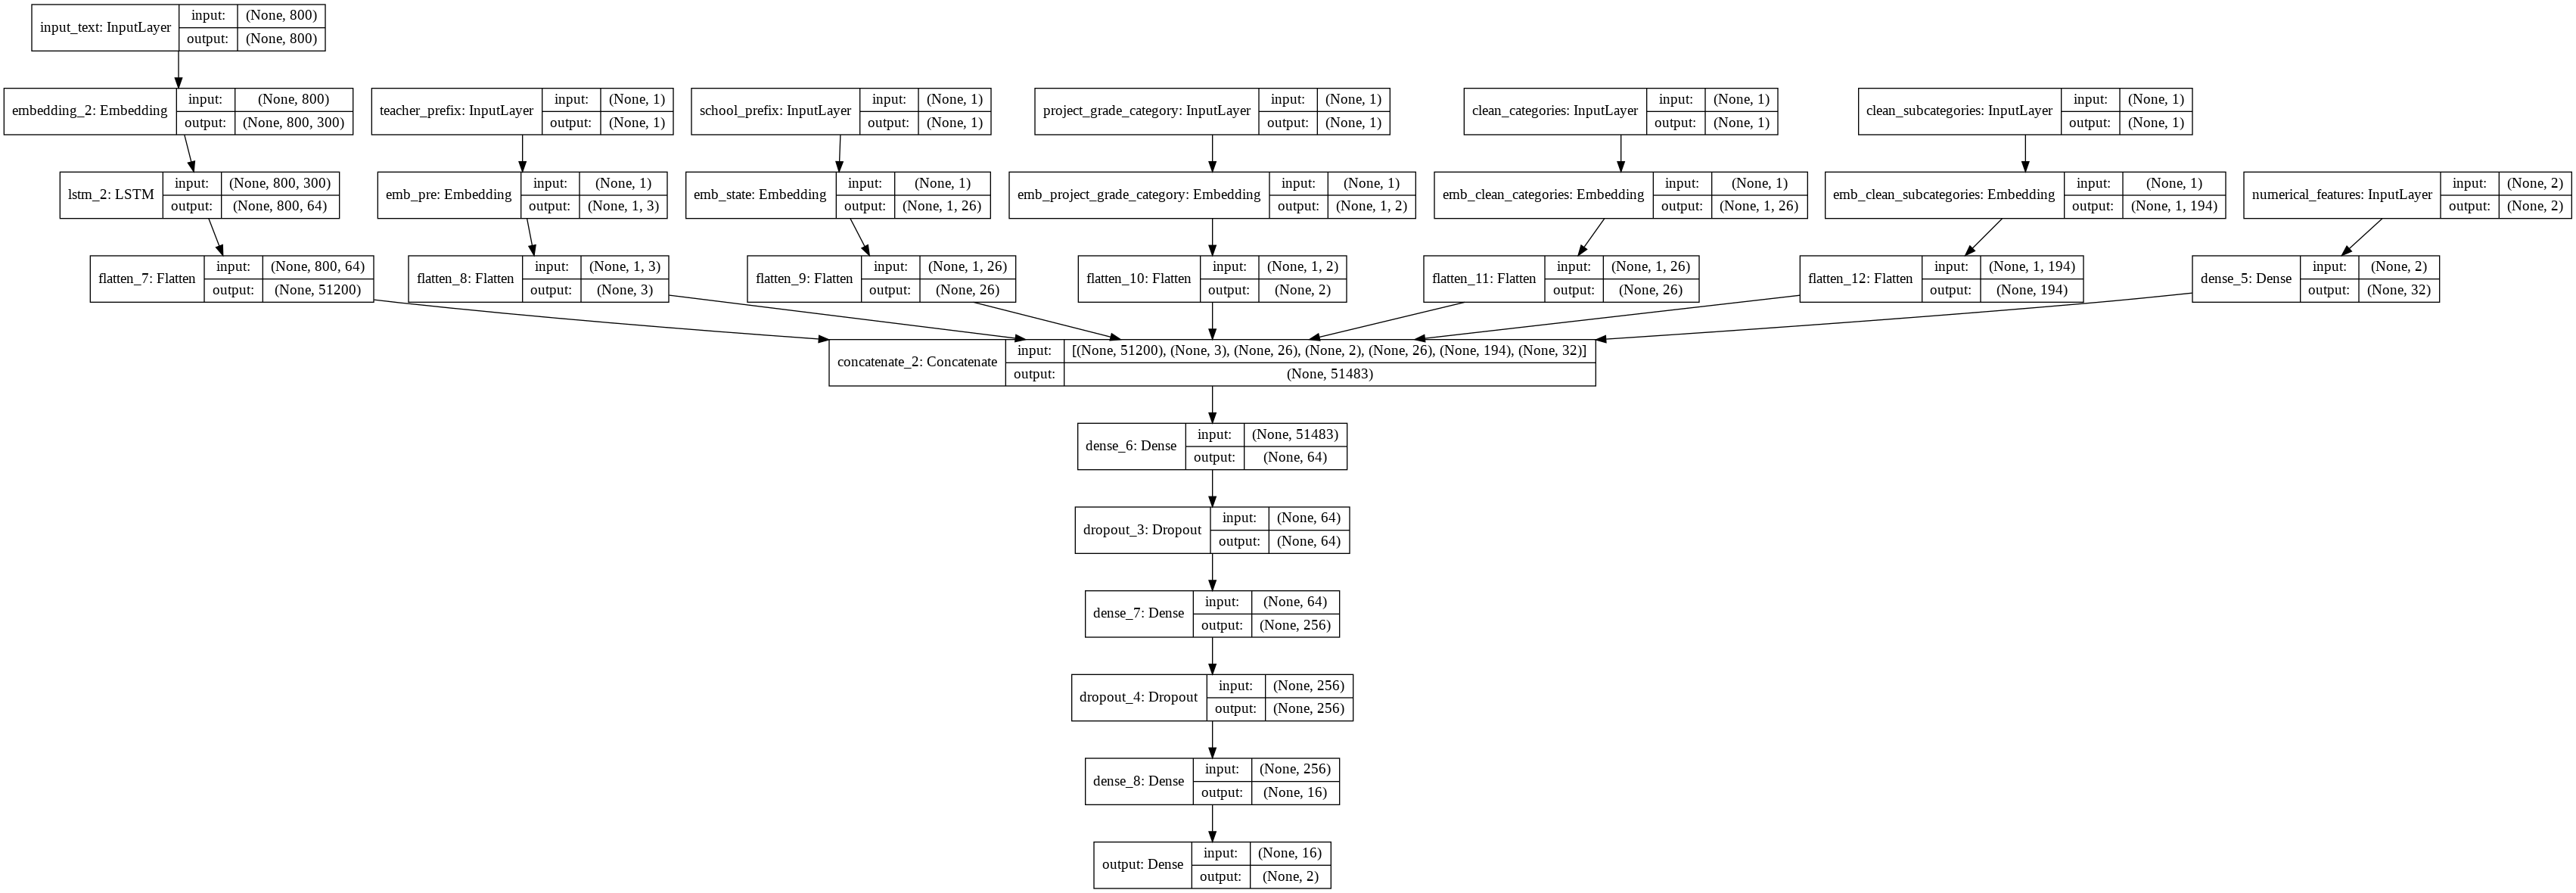

In [0]:
from keras.utils import plot_model
import pydot_ng as pydot
plot_model(model_1, show_shapes=True, show_layer_names=True, to_file='model_2.png')
from IPython.display import Image
Image(retina=True, filename='model_2.png')

In [0]:
train_data_1 = [encoded_train,
encoder_prefix_train,
encoder_state_train,
encoder_grade_train,
encoder_clean_categories_train,
encoder_clean_subcategories_train,
norm_train]
test_data_1 = [encoded_test,
encoder_prefix_test,
encoder_state_test,
encoder_grade_test,
encoder_clean_categories_test,
encoder_clean_subcategories_test ,
norm_test]
cv_data_1 = [encoded_cv,
encoder_prefix_cv,
encoder_state_cv,
encoder_grade_cv,
encoder_clean_categories_cv,
encoder_clean_subcategories_cv ,
norm_cv]

In [0]:
def auc1(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)


In [0]:
#https://www.tensorflow.org/api_docs/python/tf/py_func
def auc(y_true, y_pred):
  return tf.py_func(auc1, (y_true, y_pred), tf.double)

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auc])

In [0]:
##convert Y to one hot coding vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
Y_train = encoder.fit_transform(y_train.reshape(-1,1))
Y_cv = encoder.fit_transform(y_cv.reshape(-1,1))
Y_test = encoder.transform(y_test.reshape(-1,1))

Y_train = Y_train.toarray()
Y_cv = Y_cv.toarray()
Y_test = Y_test.toarray()

In [0]:
def auc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [65]:
history_1 = model_1.fit(train_data_1,Y_train,batch_size=512,
                        epochs=3,validation_data=(cv_data_1,Y_cv),callbacks=[TensorBoardColabCallback(tbc)])


Train on 49041 samples, validate on 24155 samples


Epoch 1/3
49041/49041 [==============================] - 1048s 21ms/step - loss: 1.0298 - auc: 0.6418 - val_loss: 0.7957 - val_auc: 0.6867

Epoch 2/3
49041/49041 [==============================] - 1036s 21ms/step - loss: 0.6899 - auc: 0.6981 - val_loss: 0.6274 - val_auc: 0.6916
Epoch 3/3
49041/49041 [==============================] - 1001s 20ms/step - loss: 0.5611 - auc: 0.7115 - val_loss: 0.5314 - val_auc: 0.6848


In [0]:
model_1.save("/content/gdrive/My Drive/Colab Notebooks/model_2.h5")

In [68]:
scores = model_1.evaluate(test_data_1, Y_test, verbose=0,batch_size=512)
print("%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

auc: 70.39%


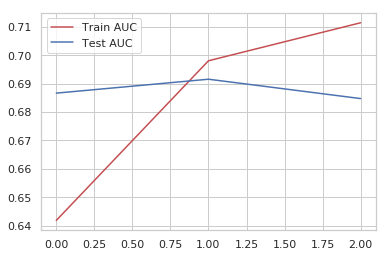

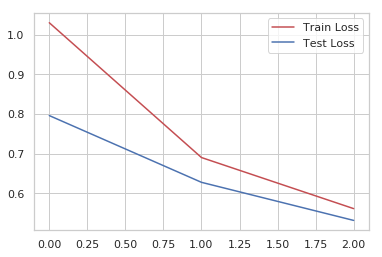

In [67]:
plt.plot(history_1.history['auc'], 'r')
plt.plot(history_1.history['val_auc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'b'})
plt.show()


plt.plot(history_1.history['loss'], 'r')
plt.plot(history_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

**Please note that first part of input and model is taken from model one and the second half is the only thing which is created and the input is simple bag of words**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) 


train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
cv_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)



In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) 
train_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
cv_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
test_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)



In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) 
train_state_ohe = vectorizer.transform(X_train['school_state'].values)
cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
test_state_ohe = vectorizer.transform(X_test['school_state'].values)



In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) 
train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)



In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) 
train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)



In [33]:
from scipy.sparse import hstack
stack_train = hstack((train_state_ohe, train_teacher_ohe, train_grade_ohe, train_categories_ohe, train_subcategories_ohe, num_train)).todense()
print(stack_train.shape)
stack_cv = hstack((cv_state_ohe, cv_teacher_ohe, cv_grade_ohe, cv_categories_ohe, cv_subcategories_ohe, num_cv)).todense()
print(stack_cv.shape)
stack_test = hstack((test_state_ohe, test_teacher_ohe, test_grade_ohe, test_categories_ohe, test_subcategories_ohe, num_test)).todense()
print(stack_test.shape)

(49041, 101)
(24155, 101)
(36052, 101)


In [0]:
other_than_text_data_train = np.expand_dims(stack_train,2)
other_than_text_data_cv = np.expand_dims(stack_cv,2)
other_than_text_data_test = np.expand_dims(stack_test,2)

In [35]:
other_than_text_data_train.shape

(49041, 101, 1)

In [35]:
input_layer_other_than_text_data = Input(shape=(101,1),name="other_than_text_data")
conv1D_1 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_initializer="he_normal")(input_layer_other_than_text_data)
conv1D_2 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_initializer="he_normal")(conv1D_1)
flatten_other_than_text_data = Flatten()(conv1D_2)

In [0]:
concatenate_layer_model_3 = concatenate([flatten_1,flatten_other_than_text_data])
model_3_dense_layer_1 = Dense(512,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(concatenate_layer_model_3)
do3_1 = Dropout(0.5)(model_3_dense_layer_1)
model_3_dense_layer_2 = Dense(128,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(do3_1)
do3_2 = Dropout(0.5)(model_3_dense_layer_2)
model_3_dense_layer_3 = Dense(64,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(do3_2)
output_3 = Dense(2, activation='softmax', name='output')(model_3_dense_layer_3)

In [0]:
model_1 = Model(inputs=[input_text,input_layer_other_than_text_data],outputs=[output_3])

In [0]:
X_train_3 = [encoded_train,other_than_text_data_train]
X_test_3 = [encoded_test,other_than_text_data_test]
X_cv_3 = [encoded_cv,other_than_text_data_cv]

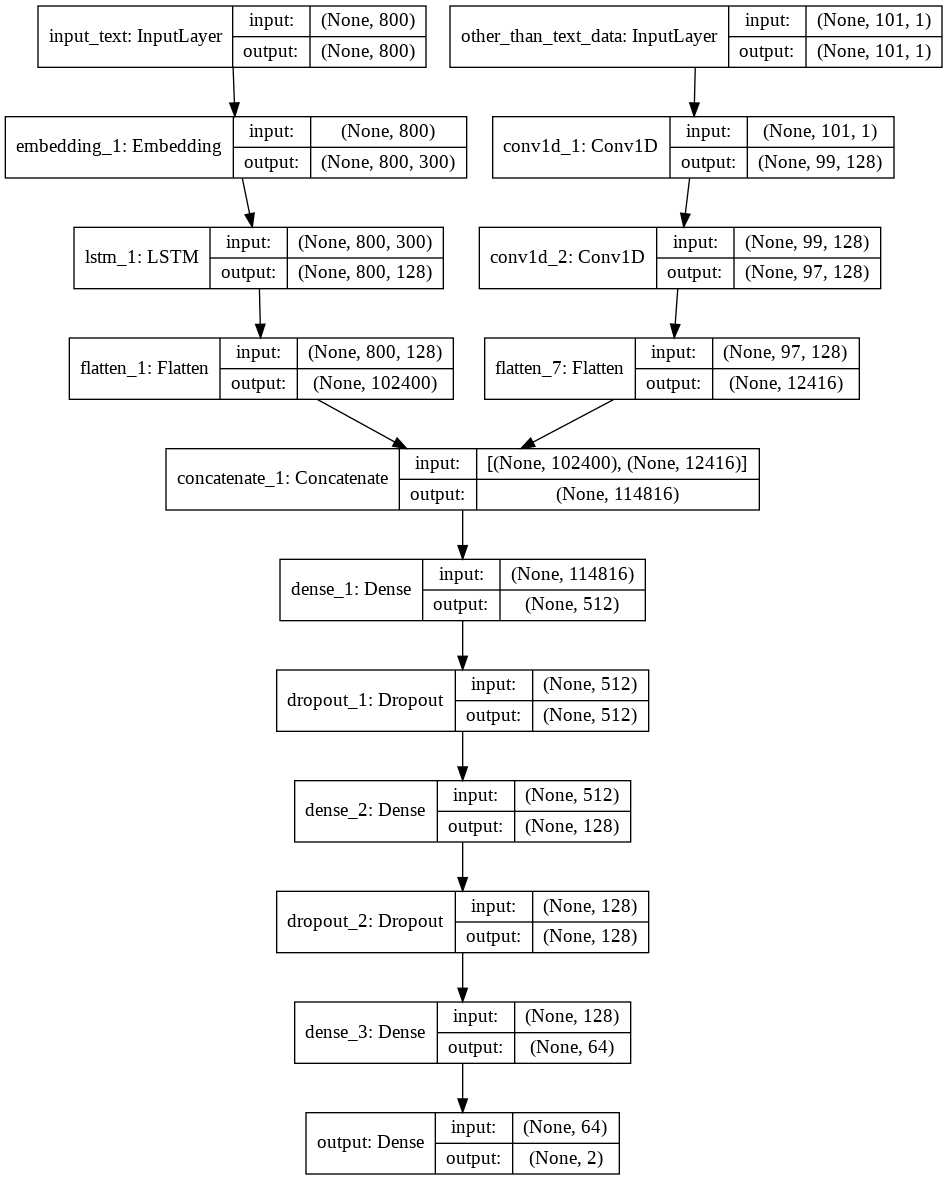

In [42]:
from keras.utils import plot_model
plot_model(model_1, show_shapes=True, show_layer_names=True, to_file='model_3.png')
from IPython.display import Image
Image(retina=True, filename='model_3.png')

In [39]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auc])



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [139]:
print(encoded_cv.shape,norm_cv_1.shape)

(24155, 800) (24155, 7, 1)


In [40]:
history_1 = model_1.fit(X_train_3,Y_train,batch_size=512,
                        epochs=10,validation_data=(X_cv_3,Y_cv),callbacks=[TensorBoardColabCallback(tbc)])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 49041 samples, validate on 24155 samples


Epoch 1/10
49041/49041 [==============================] - 1194s 24ms/step - loss: 3.0560 - auc: 0.4949 - val_loss: 2.7128 - val_auc: 0.4918

Epoch 2/10
49041/49041 [==============================] - 1195s 24ms/step - loss: 2.6564 - auc: 0.4897 - val_loss: 2.6188 - val_auc: 0.4864
Epoch 3/10
49041/49041 [==============================] - 1172s 24ms/step - loss: 2.6059 - auc: 0.4758 - val_loss: 2.6061 - val_auc: 0.4499
Epoch 4/10
49041/49041 [==============================] - 1171s 24ms/step - loss: 0.8437 - auc: 0.5661 - val_loss: 0.5678 - val_auc: 0.6675
Epoch 5/10
49041/49041 [==============================] - 1164s 24ms/step - loss: 0.5572 - auc: 0.6791 - val_loss: 0.5350 - val_auc: 0.7181
Epoch 6/10
49041/49041 [==============================] - 1159s 24ms/step - loss: 0.5282 - auc: 0.7124 - val_loss: 0.5174 - val_auc: 0.7322
Epoch 7/10


In [42]:
scores = model_1.evaluate(X_test_3, Y_test, verbose=0,batch_size=512)
print("%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

auc: 74.69%


In [0]:
model_1.save("/content/gdrive/My Drive/Colab Notebooks/model_3.h5")

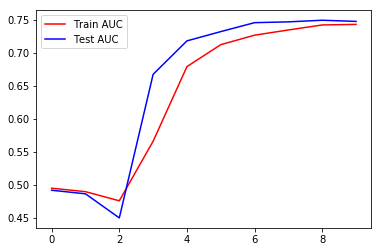

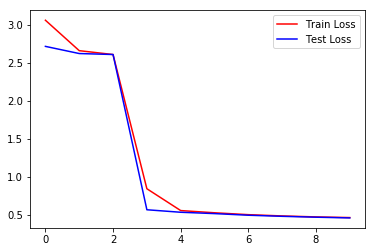

In [43]:
plt.plot(history_1.history['auc'], 'r')
plt.plot(history_1.history['val_auc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'b'})
plt.show()


plt.plot(history_1.history['loss'], 'r')
plt.plot(history_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [2]:
print("SUMMARY")
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["MODEL","AUC"]
x.add_row(["MODEL 1",73.96])
x.add_row(["MODEL 2",70.39])
x.add_row(["MODEL 3",74.69])
print(x)

SUMMARY
+---------+-------+
|  MODEL  |  AUC  |
+---------+-------+
| MODEL 1 | 73.96 |
| MODEL 2 | 70.39 |
| MODEL 3 | 74.69 |
+---------+-------+
